<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-introducao-a-classificacao-com-sklearn/blob/master/Terceiro_modelo_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nesse terceiro vamos classifica ultilizando apenas duas colunas/dimenção

##dados projeto com site com horas e preço prever se vai ser finalizado

In [38]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [39]:
renomear = {
    "expected_hours" : "horas_esperadas",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}

dados = dados.rename(columns = renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [40]:
#trabalhar as bases para ficar mais coerrente 
#trocar valores de 0 = finalizado para nao finalizado
trocar = {
    0:1,
    1:0
}
dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


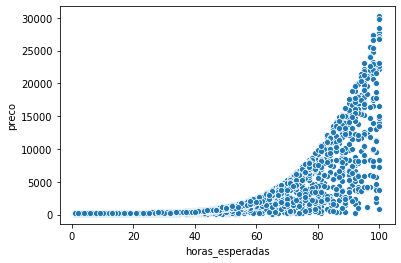

In [41]:
#desenhar os eixos plota ou impromir no grafico o X e Y
import seaborn as sns

#para atualizar a versao do pacote usar o !pip instaall seaborn==0.9.0

sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

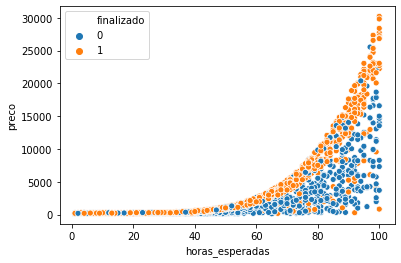

In [42]:
#ver as classese atraves da cor
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

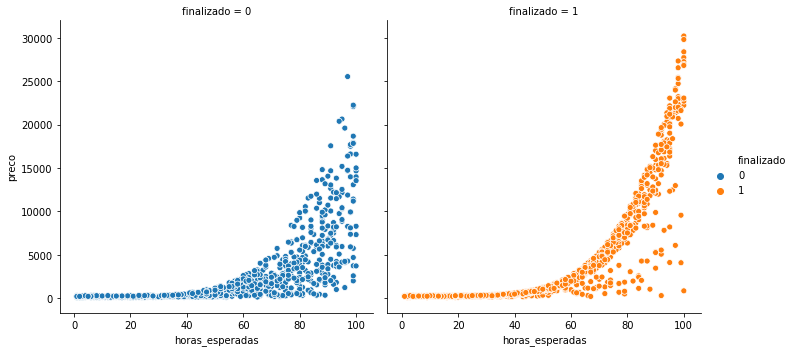

In [43]:
#outra forma é colunas de cor
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=dados)

In [44]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
SEED = 10
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, 
                                                        test_size = 0.25,
                                                        stratify = y)
print("treino: ", len(treino_x), " teste: ", len(teste_x))
model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y, previsoes)
print('acurácia  %.2f%%' % (taxa_acerto * 100))
print("\n treino classes \n", treino_y.value_counts())
print("\n teste classes \n", teste_y.value_counts())

treino:  1617  teste:  540
acurácia  58.89%

 treino classes 
 1    850
0    767
Name: finalizado, dtype: int64

 teste classes 
 1    284
0    256
Name: finalizado, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [45]:
#compara com a previsao de base
import numpy as np
previsoes_base = np.ones(540)
taxa_acerto = accuracy_score(teste_y, previsoes_base)
print('acurácia do baseline  %.2f%%' % (taxa_acerto * 100))

acurácia do baseline  52.59%


#Curva de decisão, quando estiver em duas dimensoes podemo pintar as matrizes para identificar o erro.

assim podemos ver que o algotimo escolhido so faz uma reta e nossa distribuiçao tem uma curva

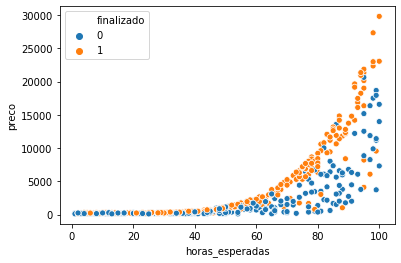

In [46]:
#analizara as classificacoes
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

In [47]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 100 29820


In [0]:
#criamos todos os eixo
pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixel)
eixo_y = np.arange(x_min, x_max, (x_max-x_min)/pixel)

In [49]:
#agora criar uma matrix em um grid
xx, yy = np.meshgrid(eixo_x, eixo_y)
#mesclar de verdade
xx.ravel()[:110]
yy.ravel()[:110]

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99])

In [50]:
#concatenar os pontos
pontos = np.c_[xx.ravel(),yy.ravel()]
pontos

array([[ 1.  ,  1.  ],
       [ 1.99,  1.  ],
       [ 2.98,  1.  ],
       ...,
       [97.03, 99.01],
       [98.02, 99.01],
       [99.01, 99.01]])

In [51]:
#prever todo os pontos
Z = model.predict(pontos)
#obsevar o formato
print(Z.shape)
print(xx.shape)

(10000,)
(100, 100)


In [52]:
#precisa redimencinar os resultado 10.000 por 100 por 100
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

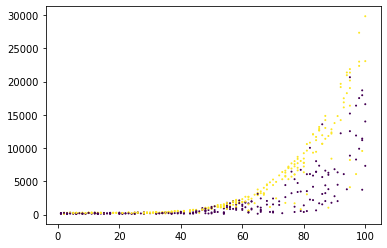

In [53]:
#potagem usar biblioteca  baixo nivel
import matplotlib.pyplot as plt
#pontos jogados
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

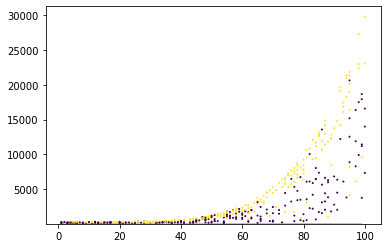

In [54]:
#CURVA DE DECISAO a DECISION BOUNDARY

#esse algorimo so é bom para criar uma reta linear porem os dado sao uma curva

#colocar cum contorno
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

#matrix correlação

In [11]:
#https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb
#O pandas nos fornece a função corr() para calcular a correlação
teste_x.corr()

,horas_esperadas,preco
horas_esperadas,1.000000,0.691688
preco,0.691688,1.000000


In [16]:
#https://matplotlib.org/tutorials/introductory/pyplot.html
import matplotlib.pyplot as plt

#Para facilitar a visualização das correlações pode-se recorrer às cores
teste_x.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,horas_esperadas,preco
horas_esperadas,1.0,0.91
preco,0.91,1.0
